In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [2]:
data_dir = 'G:\My Drive\CEC ADM Load Shape data'

In [3]:
cz = '3'

## Look at base data

In [4]:
base = pd.read_csv(os.path.join(data_dir, 'Base load shapes','Base', 'Com','Commercial_FCZ'+cz+'.csv'), index_col=0)

In [5]:
base.head()

FCZ Building.Type        date  hour  Whole_Building   Cooling   Heating  \
1    3       College  2018-01-01     0        0.000106  0.000064  0.000236   
2    3       College  2018-01-01     1        0.000107  0.000064  0.000247   
3    3       College  2018-01-01     2        0.000106  0.000064  0.000283   
4    3       College  2018-01-01     3        0.000107  0.000065  0.000307   
5    3       College  2018-01-01     4        0.000110  0.000065  0.000314   

   Ventilation   Cooking  Indoor_Lighting   ...     Water_Heating  \
1     0.000100  0.000121         0.000112   ...          0.000120   
2     0.000099  0.000118         0.000106   ...          0.000114   
3     0.000099  0.000117         0.000105   ...          0.000114   
4     0.000100  0.000117         0.000105   ...          0.000114   
5     0.000100  0.000117         0.000107   ...          0.000111   

   Outdoor_Lighting  Daylighting.Eff  Economizer.Eff  Heat.Pump.Eff  \
1          0.000237         0.000005        0.000260       0.000020   
2          0.000237         0.000005        0.000260       0.000022   
3          0.000237         0.000006        0.000260       0.000025   
4          0.000237         0.000006        0.000261       0.000031   
5          0.000237         0.000006        0.000261       0.000031   

   Indoor.Lighting.Eff  Occsensor.Eff  Month  Day  Workday  
1             0.000111       0.000096      1    1    False  
2             0.000105       0.000142      1    1    False  
3             0.000104       0.000149      1    1    False  
4             0.000104       0.000117      1    1    False  
5             0.000106       0.000207      1    1    False  

[5 rows x 23 columns]

In [6]:
base['Building.Type'].unique()

array(['College', 'Food', 'Health Care', 'Hotel', 'Miscellaneous',
       'Office', 'Refrigerated Warehouse', 'Restaurant', 'Retail',
       'School', 'Warehouse'], dtype=object)

In [7]:
ofc = base.loc[base['Building.Type']=='Office'].reset_index()
len(ofc)

8760

In [8]:
ofc.columns

Index(['index', 'FCZ', 'Building.Type', 'date', 'hour', 'Whole_Building',
       'Cooling', 'Heating', 'Ventilation', 'Cooking', 'Indoor_Lighting',
       'Miscellaneous', 'Office_Equipment', 'Refrigeration', 'Water_Heating',
       'Outdoor_Lighting', 'Daylighting.Eff', 'Economizer.Eff',
       'Heat.Pump.Eff', 'Indoor.Lighting.Eff', 'Occsensor.Eff', 'Month', 'Day',
       'Workday'],
      dtype='object')

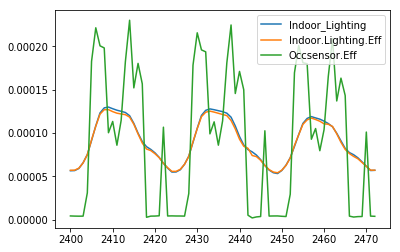

In [9]:
ofc.loc[100*24:103*24,['Indoor_Lighting', 'Indoor.Lighting.Eff', 'Occsensor.Eff']].plot()

## Look at EE data and compare

In [10]:
eff_pge = pd.read_csv(os.path.join(data_dir, 'EE load shapes','EE', 'com_efficiency_shapes_pge.csv'))

In [11]:
eff_pge.head()

FCZ Building.Type      date  hour  Daylighting.Eff  Economizer.Eff  \
0    1       College  1/1/2018     0         0.000006        0.000211   
1    1       College  1/1/2018     1         0.000006        0.000199   
2    1       College  1/1/2018     2         0.000006        0.000208   
3    1       College  1/1/2018     3         0.000007        0.000221   
4    1       College  1/1/2018     4         0.000007        0.000221   

   Heat.Pump.Eff  Indoor.Lighting.Eff  Occsensor.Eff  Month  Day  Workday  
0       0.000217             0.000079       0.000056      1    1    False  
1       0.000183             0.000078       0.000074      1    1    False  
2       0.000207             0.000078       0.000061      1    1    False  
3       0.000268             0.000081       0.000121      1    1    False  
4       0.000273             0.000085       0.000119      1    1    False

In [12]:
eff_pge_ofc = eff_pge.loc[(eff_pge['Building.Type']=='Office') & (eff_pge['FCZ']==ofc.loc[0,'FCZ'])].reset_index()
len(eff_pge_ofc)

8760

In [13]:
(eff_pge_ofc.loc[100*24:103*24, 'Occsensor.Eff'] - ofc.loc[100*24:103*24, 'Occsensor.Eff']).head()

2400    0.0
2401    0.0
2402    0.0
2403    0.0
2404    0.0
Name: Occsensor.Eff, dtype: float64

### Conclusion: the efficiency information is already completely contained in the base files

## Now let's just look at the base data and try to figure out what the heck the EE curves mean

In [14]:
#All of the time series sum to 1.0... so these are fractions of the total.
ofc[['Indoor_Lighting', 'Indoor.Lighting.Eff', 'Occsensor.Eff']].sum()

Indoor_Lighting        1.0
Indoor.Lighting.Eff    1.0
Occsensor.Eff          1.0
dtype: float64

In [15]:
#Based on the above, we can plot various ways of saving 20% with lighting efficiency upgrades.
#First, let's save 20% of total lighting energy with more efficient lamps/luminaires, without controls. 
#Note that this means that the total reduction in energy savings (including interactive effects) is 
#20% of the baseline lighting consumption.
start = 100
end = 105

ax = ofc.loc[start*24:end*24,'Indoor_Lighting'].plot()
(ofc.loc[start*24:end*24,'Indoor_Lighting']-ofc.loc[start*24:end*24,'Indoor.Lighting.Eff']*0.2).plot()
ax.set_ylim([0,0.00015])

(0, 0.00015)

(0, 0.00015)

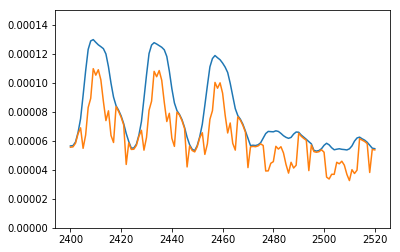

In [16]:
#Now the same thing with occupancy sensors only
ax = ofc.loc[start*24:end*24,'Indoor_Lighting'].plot()
(ofc.loc[start*24:end*24,'Indoor_Lighting']-ofc.loc[start*24:end*24,'Occsensor.Eff']*0.2).plot()
ax.set_ylim([0,0.00015])

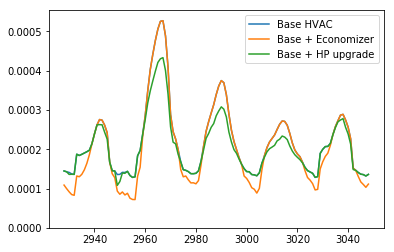

In [17]:
#HVAC with Economizer or HP
start = 122
end = 127

ax = ofc.loc[start*24:end*24,['Heating','Cooling','Ventilation']].sum(axis=1).plot(label='Base HVAC')

(ofc.loc[start*24:end*24,['Heating','Cooling','Ventilation']].sum(axis=1) - 
 ofc.loc[start*24:end*24,'Economizer.Eff']*0.2).plot(ax=ax, label='Base + Economizer')


(ofc.loc[start*24:end*24,['Heating','Cooling','Ventilation']].sum(axis=1) - 
 ofc.loc[start*24:end*24,'Heat.Pump.Eff']*0.2).plot(ax=ax, label='Base + HP upgrade')

peak = ofc.loc[start*24:end*24,['Heating','Cooling','Ventilation']].sum(axis=1).max()
ax.set_ylim([0,peak*1.05])
ax.legend()

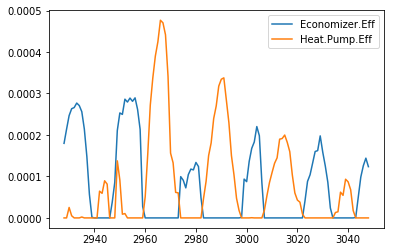

In [18]:
#start=200
#end=205
ofc.loc[start*24:end*24,['Economizer.Eff','Heat.Pump.Eff']].plot()

## Create a function for plotting baseline shapes and savings

0.10239682769057415


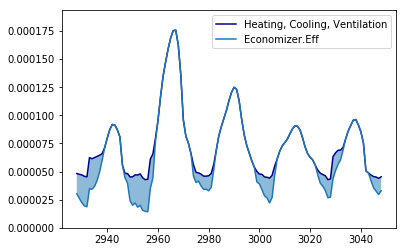

In [19]:
start = 122
end = 127
base = ['Heating', 'Cooling','Ventilation']
eff = 'Economizer.Eff'

def plot_savings_ribbon(data, start, end, base, eff, 
                        frac=0.1, reset_index=False, linewidth=1.5, legend=True, ax=None):
    '''Plot baseline and post-measure with a filled region showing the savings'''
    baseser = data.loc[start*24:end*24,base]
    baselab=base
    if type(base)==type([]):
        baseser = data[base].sum(axis=1)
        baseser/=baseser.sum()
        baseser = baseser.loc[start*24:end*24]
        baselab=', '.join(base)
    
    effser = data[eff].mul(frac).loc[start*24:end*24]
    
    if reset_index:
        baseser=baseser.reset_index(drop=True)
        effser=effser.reset_index(drop=True)
        
    ax=baseser.plot(color='darkblue', label=baselab, linewidth=linewidth, ax=ax)
    (baseser-effser).plot(ax=ax, label=eff, linewidth=linewidth)
    plt.fill_between(baseser.index, baseser.values, (baseser-effser).values, alpha=0.5)
    peak=baseser.max()
    ax.set_ylim([0,peak*1.1])
    if legend:
        plt.legend()
    print(effser.sum()/baseser.sum())
    return ax
    
ax=plot_savings_ribbon(ofc,start,end, ['Heating','Cooling','Ventilation'],eff, 0.1)

0.10482569495258717


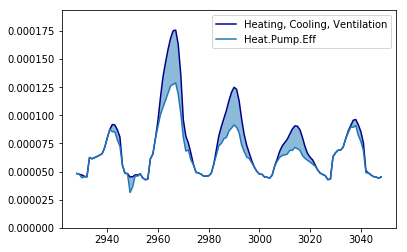

In [20]:
plot_savings_ribbon(ofc,start,end,['Heating','Cooling','Ventilation'],'Heat.Pump.Eff', 0.1)

0.20459071912479268


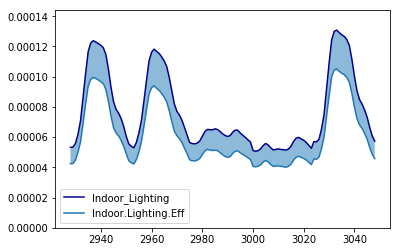

In [21]:
plot_savings_ribbon(ofc,start,end,'Indoor_Lighting','Indoor.Lighting.Eff',0.2)

0.20176957973254045


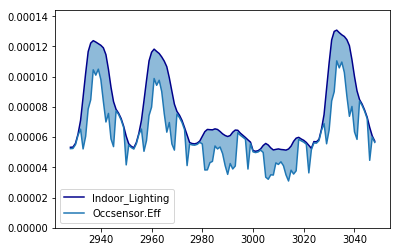

In [22]:
plot_savings_ribbon(ofc,start,end,'Indoor_Lighting','Occsensor.Eff', 0.2)

0.23283912046561223


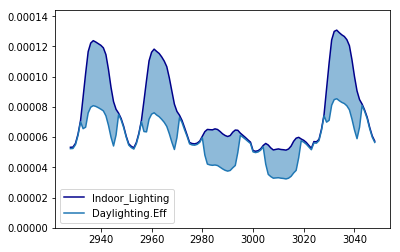

In [23]:
plot_savings_ribbon(ofc,start,end,'Indoor_Lighting','Daylighting.Eff', 0.2)

### Look at a different parts of the year

0.0012291542748067523


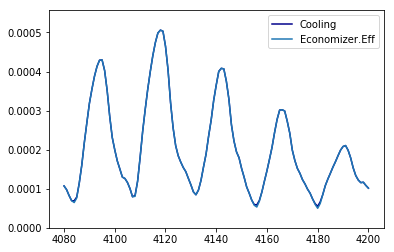

In [24]:
#Hot summer periods
start=170
end=175
plot_savings_ribbon(ofc,start,end,'Cooling', 'Economizer.Eff', 0.1)

0.23410827219067978


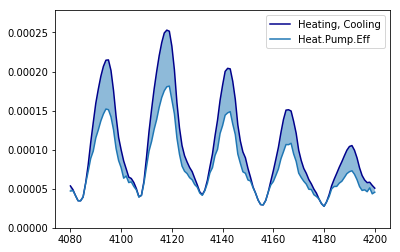

In [25]:
plot_savings_ribbon(ofc,start,end,['Heating','Cooling'], 'Heat.Pump.Eff', 0.1)

0.16279631666355535


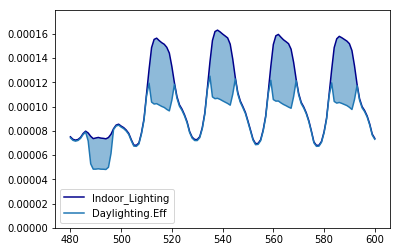

In [26]:
#Winter
start=20
end=25
plot_savings_ribbon(ofc,start,end,'Indoor_Lighting','Daylighting.Eff', 0.2)

0.19697516246479962


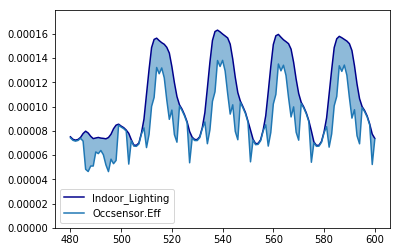

In [27]:
plot_savings_ribbon(ofc,start,end,'Indoor_Lighting','Occsensor.Eff', 0.2)

0.19618136470410327


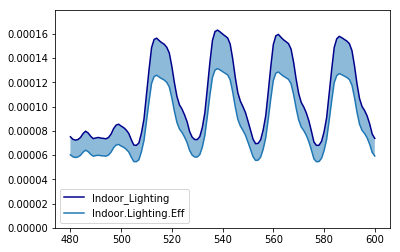

In [28]:
plot_savings_ribbon(ofc,start,end,'Indoor_Lighting','Indoor.Lighting.Eff', 0.2)

In [29]:

plot_savings_ribbon(ofc,start,end,'Cooling', 'Economizer.Eff', 0.1)

0.5453923515018443


0.02104602993878162


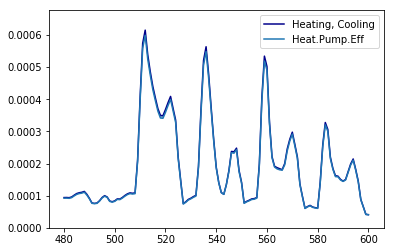

In [30]:
plot_savings_ribbon(ofc,start,end,['Heating','Cooling'], 'Heat.Pump.Eff', 0.1)

## Look at Res for good measure

In [31]:
cz='5'
base = pd.read_csv(os.path.join(data_dir, 'Base load shapes','Base', 'Res','Residential_FCZ'+cz+'.csv'), index_col=0)

In [32]:
base.head()

FCZ Building.Type        date  hour  Whole_Building   Cooking  Cooling  \
1    5   MULTIFAMILY  2018-01-01     0        0.000090  0.000041      0.0   
2    5   MULTIFAMILY  2018-01-01     1        0.000084  0.000035      0.0   
3    5   MULTIFAMILY  2018-01-01     2        0.000080  0.000035      0.0   
4    5   MULTIFAMILY  2018-01-01     3        0.000077  0.000040      0.0   
5    5   MULTIFAMILY  2018-01-01     4        0.000076  0.000036      0.0   

   Dishwasher     Dryer   Freezer     ...      Water Heating - Washer  Month  \
1    0.000038  0.000042  0.000083     ...                    0.000012      1   
2    0.000023  0.000019  0.000082     ...                    0.000007      1   
3    0.000016  0.000009  0.000081     ...                    0.000005      1   
4    0.000011  0.000004  0.000080     ...                    0.000005      1   
5    0.000012  0.000005  0.000078     ...                    0.000007      1   

   Day  Workday  Cooling.Eff  Heat.Pump.Eff  Insulation.Eff  ResLighting.Eff  \
1    1    False          0.0       0.000102        0.000089         0.000083   
2    1    False          0.0       0.000106        0.000086         0.000061   
3    1    False          0.0       0.000110        0.000090         0.000050   
4    1    False          0.0       0.000119        0.000091         0.000045   
5    1    False          0.0       0.000131        0.000090         0.000047   

   ResOccsensor.Eff  Window.Eff  
1          0.000213    0.000068  
2          0.000120    0.000063  
3          0.000073    0.000066  
4          0.000055    0.000068  
5          0.000049    0.000069  

[5 rows x 36 columns]

In [33]:
base['Building.Type'].unique()

array(['MULTIFAMILY', 'SINGLEFAMILY'], dtype=object)

In [34]:
sf = base.loc[base['Building.Type']=='SINGLEFAMILY'].reset_index()
len(sf)

8760

In [35]:
sf.columns

Index(['index', 'FCZ', 'Building.Type', 'date', 'hour', 'Whole_Building',
       'Cooking', 'Cooling', 'Dishwasher', 'Dryer', 'Freezer', 'Furnace Fan',
       'Heating', 'Lighting', 'Miscellaneous', 'Pool Heater', 'Pool Pump',
       'Refrigerator', 'Solar Pool Pump', 'Solar Water Heat - Back-up',
       'Solar Water Heat - Pump', 'Spa Heater', 'Spa Pump', 'Television',
       'Washer', 'Water Heater - All Other', 'Water Heating - Dishwasher',
       'Water Heating - Washer', 'Month', 'Day', 'Workday', 'Cooling.Eff',
       'Heat.Pump.Eff', 'Insulation.Eff', 'ResLighting.Eff',
       'ResOccsensor.Eff', 'Window.Eff'],
      dtype='object')

0.6510597660816942


(-2e-05, 7e-05)

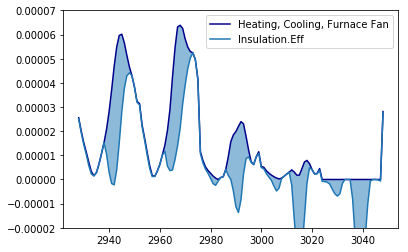

In [36]:
#Pretty clearly the savings shapes do not use the same weather assumptions as the load shapes...
start=122
end=127
ax=plot_savings_ribbon(sf,start,end,['Heating','Cooling', 'Furnace Fan'], 'Insulation.Eff', 0.1)
ax.set_ylim([-0.00002,0.00007])

0.10978119761095456


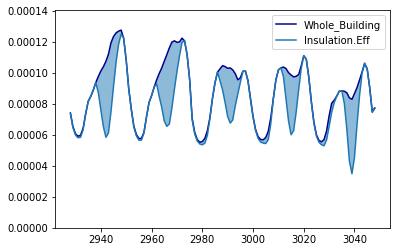

In [37]:
ax=plot_savings_ribbon(sf,start,end,'Whole_Building', 'Insulation.Eff', 0.1)

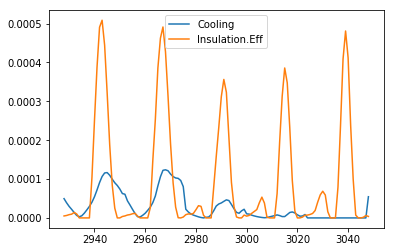

In [38]:
#The plot below makes no sense. There shouldn't be any insulaiton savings when cooling loads are zero.
sf.loc[start*24:end*24, ['Cooling','Insulation.Eff']].plot()

0.2224233114279093


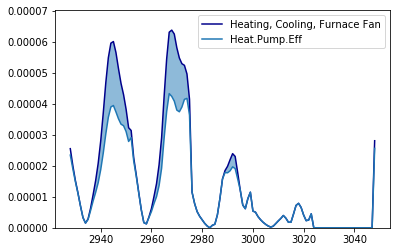

In [39]:
ax=plot_savings_ribbon(sf,start,end,['Heating','Cooling', 'Furnace Fan'], 'Heat.Pump.Eff', 0.1)


0.29237218861207953


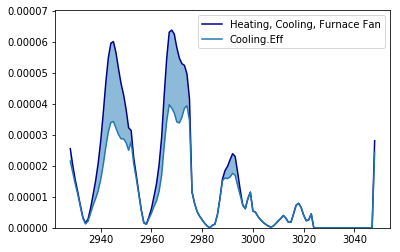

In [40]:
ax=plot_savings_ribbon(sf,start,end,['Heating','Cooling', 'Furnace Fan'], 'Cooling.Eff', 0.1)

0.020226658788500277


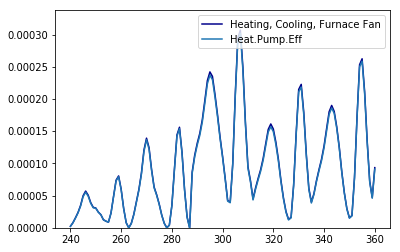

In [41]:
#Winter HVAC savings are zero. No electric heating assumed.
plot_savings_ribbon(sf,10,15,['Heating','Cooling', 'Furnace Fan'], 'Heat.Pump.Eff', 0.1)

0.22920077434433192


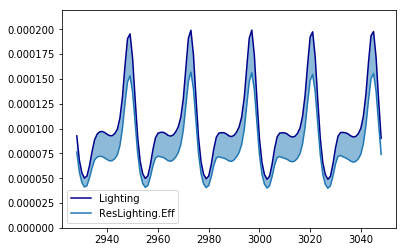

In [42]:
ax=plot_savings_ribbon(sf,start,end,'Lighting', 'ResLighting.Eff', 0.2)

0.24312517240033435


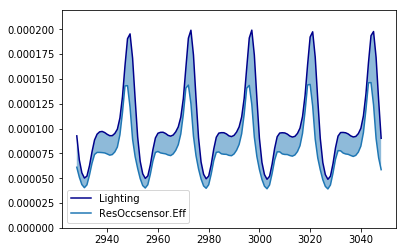

In [43]:
ax=plot_savings_ribbon(sf,start,end,'Lighting', 'ResOccsensor.Eff', 0.2)

## Create nice-looking plots for the report

0.19940730339193363


(1, 24)

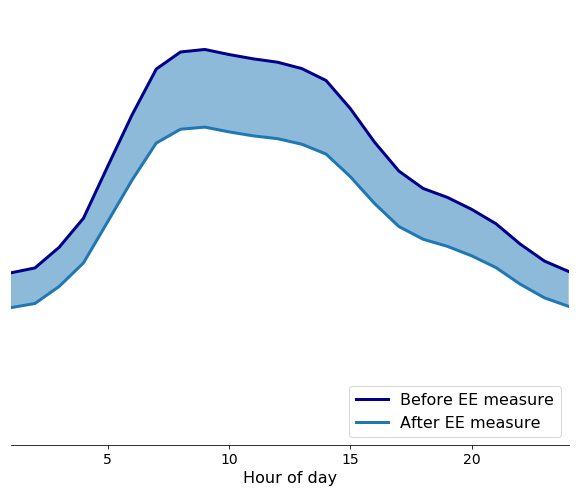

In [63]:
start=126
end=127
fig, ax = plt.subplots(figsize=[10,8])
ax = plot_savings_ribbon(ofc,start,end,'Indoor_Lighting','Indoor.Lighting.Eff',0.2, 
                         reset_index=True, linewidth=3, legend=False, ax=ax)
ax.set_yticklabels([])
ax.set_yticks([])
ax.tick_params(labelsize=14)
ax.set_xlabel('Hour of day', size=16)
#ax.set_xticklabels(np.arange(24)+1)
ax.legend(ax.lines,['Before EE measure', 'After EE measure'], fontsize=16, loc='lower right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlim([1,24])

0.20021383323774505


(1, 24)

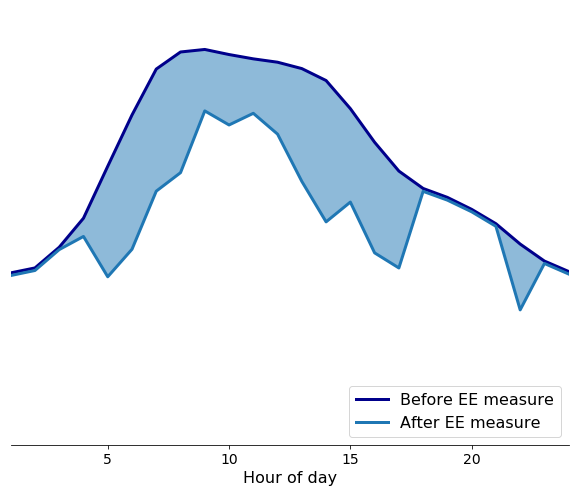

In [64]:

fig, ax = plt.subplots(figsize=[10,8])
ax = plot_savings_ribbon(ofc,start,end,'Indoor_Lighting','Occsensor.Eff',0.2, 
                         ax=ax, reset_index=True, linewidth=3, legend=False)
ax.set_yticklabels([])
ax.set_yticks([])
ax.tick_params(labelsize=14)
ax.set_xlabel('Hour of day', size=16)
ax.legend(ax.lines,['Before EE measure', 'After EE measure'], fontsize=16, loc='lower right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlim([1,24])

In [61]:
ax.legend?


In [47]:
ax.lines